In [9]:
import nltk
import pandas as pd
import numpy as np

In [ ]:
# nltk.download_shell()

In [4]:
# nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [5]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [6]:
print(len(messages))

5574


In [7]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [8]:
# collection of text is also called corpus

for msg_num,message in enumerate(messages[:10]):
    print(msg_num,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [12]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection',
                        sep='\t',
                        names=['label','message'])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# EDA

In [13]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [14]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [15]:
messages['length'] = messages['message'].apply(len)

In [16]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot: ylabel='Frequency'>

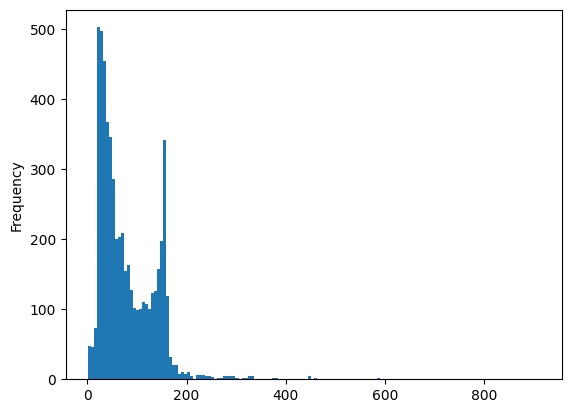

In [19]:
messages['length'].plot.hist(bins=150)

In [20]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [21]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [23]:
sns.set()

array([<AxesSubplot: title={'center': 'ham'}>,
       <AxesSubplot: title={'center': 'spam'}>], dtype=object)

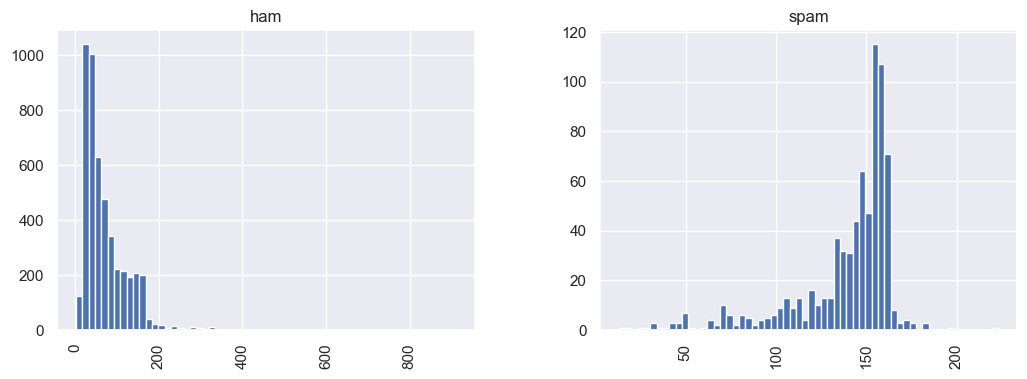

In [24]:
messages.hist(column='length',by='label',bins=60,figsize=(12,4))

In [25]:
import string

In [26]:
msg = 'Sample message! with punctions..:'

In [27]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [29]:
print([c for c in msg if c not in string.punctuation])

['S', 'a', 'm', 'p', 'l', 'e', ' ', 'm', 'e', 's', 's', 'a', 'g', 'e', ' ', 'w', 'i', 't', 'h', ' ', 'p', 'u', 'n', 'c', 't', 'i', 'o', 'n', 's']


In [31]:
from nltk.corpus import stopwords

print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [35]:
x = ['a','b','c','d']
''.join(x)

'abcd'

In [37]:
'-'.join(x)

'a-b-c-d'

In [38]:
'+-+'.join(x)

'a+-+b+-+c+-+d'

In [33]:
nopunc = [c for c in msg if c not in string.punctuation]
print(nopunc)

['S', 'a', 'm', 'p', 'l', 'e', ' ', 'm', 'e', 's', 's', 'a', 'g', 'e', ' ', 'w', 'i', 't', 'h', ' ', 'p', 'u', 'n', 'c', 't', 'i', 'o', 'n', 's']


In [34]:
nopunc = ''.join(nopunc)
print(nopunc)

Sample message with punctions


In [39]:
nopunc.split()

['Sample', 'message', 'with', 'punctions']

In [42]:
clean_msg = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
clean_msg

['Sample', 'message', 'punctions']

In [43]:
def text_process(msg):
    """
    1) remove punctuations
    2) remove stopwords
    3) return list of clean text words
    """

    nopunc = [char for char in msg if char not in string.punctuation]
    nopunc = ''.join(nopunc)

    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [44]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [45]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

### Continuing Normalization

There are a lot of ways to continue normalizing this text. Such as [Stemming](https://en.wikipedia.org/wiki/Stemming) or distinguishing by [part of speech](http://www.nltk.org/book/ch05.html).

NLTK has lots of built-in tools and great documentation on a lot of these methods. Sometimes they don't work well for text-messages due to the way a lot of people tend to use abbreviations or shorthand, For example:
    
    'Nah dawg, IDK! Wut time u headin to da club?'
    
versus

    'No dog, I don't know! What time are you heading to the club?'
    
Some text normalization methods will have trouble with this type of shorthand and so I'll leave you to explore those more advanced methods through the [NLTK book online](http://www.nltk.org/book/).

For now we will just focus on using what we have to convert our list of words to an actual vector that SciKit-Learn can use.

## Vectorization

Currently, we have the messages as lists of tokens (also known as [lemmas](http://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html)) and now we need to convert each of those messages into a vector the SciKit Learn's algorithm models can work with.

Now we'll convert each message, represented as a list of tokens (lemmas) above, into a vector that machine learning models can understand.

We'll do that in three steps using the bag-of-words model:

1. Count how many times does a word occur in each message (Known as term frequency)

2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)

3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

Let's begin the first step:

Each vector will have as many dimensions as there are unique words in the SMS corpus.  We will first use SciKit Learn's **CountVectorizer**. This model will convert a collection of text documents to a matrix of token counts.

We can imagine this as a 2-Dimensional matrix. Where the 1-dimension is the entire vocabulary (1 row per word) and the other dimension are the actual documents, in this case a column per text message. 

For example:

<table border = “1“>
<tr>
<th></th> <th>Message 1</th> <th>Message 2</th> <th>...</th> <th>Message N</th> 
</tr>
<tr>
<td><b>Word 1 Count</b></td><td>0</td><td>1</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word 2 Count</b></td><td>0</td><td>0</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>...</b></td> <td>1</td><td>2</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word N Count</b></td> <td>0</td><td>1</td><td>...</td><td>1</td>
</tr>
</table>


Since there are so many messages, we can expect a lot of zero counts for the presence of that word in that document. Because of this, SciKit Learn will output a [Sparse Matrix](https://en.wikipedia.org/wiki/Sparse_matrix).

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [47]:
print(len(bow_transformer.vocabulary_))

11425


In [48]:
msg4 = messages['message'][3]
print(msg4)

U dun say so early hor... U c already then say...


In [50]:
bow4 = bow_transformer.transform([msg4])
print(bow4)
print('\n')
print(type(bow4))
print('\n')
print(bow4.shape)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


<class 'scipy.sparse._csr.csr_matrix'>


(1, 11425)


In [52]:
bow_transformer.get_feature_names_out()[4068]

'U'

In [53]:
bow_transformer.get_feature_names_out()[9554]

'say'

In [54]:
messages_bow = bow_transformer.transform(messages['message'])

In [55]:
print('Shape of Sparse Matrix: ', messages_bow.shape)

Shape of Sparse Matrix:  (5572, 11425)


In [56]:
# Non Zero occurences
messages_bow.nnz

50548

In [65]:
print(messages_bow.shape[0], ',',
        messages_bow.shape[1])

5572 , 11425


In [60]:
sparsity = (100 * messages_bow.nnz/(messages_bow.shape[0] * messages_bow.shape[1]))
print(f'Sparsity: {sparsity}')
print(f'Sparsity: {round((sparsity),2)}')

Sparsity: 0.07940295412668218
Sparsity: 0.08


In [66]:
from sklearn.feature_extraction.text import TfidfTransformer

In [67]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [68]:
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [69]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [70]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [71]:
from sklearn.naive_bayes import MultinomialNB

spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [72]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [73]:
messages['label'][3]

'ham'

In [74]:
all_pred = spam_detect_model.predict(messages_tfidf)
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [75]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = train_test_split(messages['message'],
                                                                messages['label'],
                                                                test_size=0.3)

In [76]:
msg_train

3641    He's really into skateboarding now despite the...
1949    I cant pick the phone right now. Pls send a me...
229     Life is more strict than teacher... Bcoz Teach...
4721    Forgot to tell ü smth.. Can ü like number the ...
1626    Hi Dear Call me its urgnt. I don't know whats ...
                              ...                        
3078              There is no sense in my foot and penis.
1944    I got lousy sleep. I kept waking up every 2 ho...
2306    Still in the area of the restaurant. Ill try t...
1077         Where can download clear movies. Dvd copies.
4971    We are supposed to meet to discuss abt our tri...
Name: message, Length: 3900, dtype: object

In [77]:
# messages['message'].iloc[4268]

'SORRY IM STIL FUCKED AFTER LAST NITE WENT TOBED AT 430 GOT UP 4 WORK AT 630'

In [79]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [80]:
pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000019C846C5940>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [81]:
preds = pipeline.predict(msg_test)

In [82]:
from sklearn.metrics import classification_report
print(classification_report(label_test,preds))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1446
        spam       1.00      0.68      0.81       226

    accuracy                           0.96      1672
   macro avg       0.98      0.84      0.89      1672
weighted avg       0.96      0.96      0.95      1672



In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('rf_classifier',RandomForestClassifier())
])

pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000019C846C5940>)),
                ('tfidf', TfidfTransformer()),
                ('rf_classifier', RandomForestClassifier())])

In [86]:
rf_preds = pipeline.predict(msg_test)

In [87]:
from sklearn.metrics import classification_report
print(classification_report(label_test,rf_preds))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1446
        spam       1.00      0.76      0.86       226

    accuracy                           0.97      1672
   macro avg       0.98      0.88      0.92      1672
weighted avg       0.97      0.97      0.97      1672

